<a href="https://colab.research.google.com/github/lakshmansamvith/Kaggle-Compete-/blob/master/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing CSV into DataFrame

In [0]:
import pandas as pd 
import numpy as np 
DataFrame = pd.read_csv('https://raw.githubusercontent.com/lakshmansamvith/Kaggle-Compete-/master/Day2/diamonds.csv')
DataFrame = DataFrame.drop(['Unnamed: 0'], axis=1)
#DataFrame

#Checking for Null Values 

In [73]:
null_values = DataFrame.isnull().sum()
print(null_values)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


#Ordinal Encoder 

In [0]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
DataFrame[['cut', 'color', 'clarity']] = ordinal_encoder.fit_transform((DataFrame[['cut', 'color', 'clarity']]))



#Visualizing Values through HeatMap

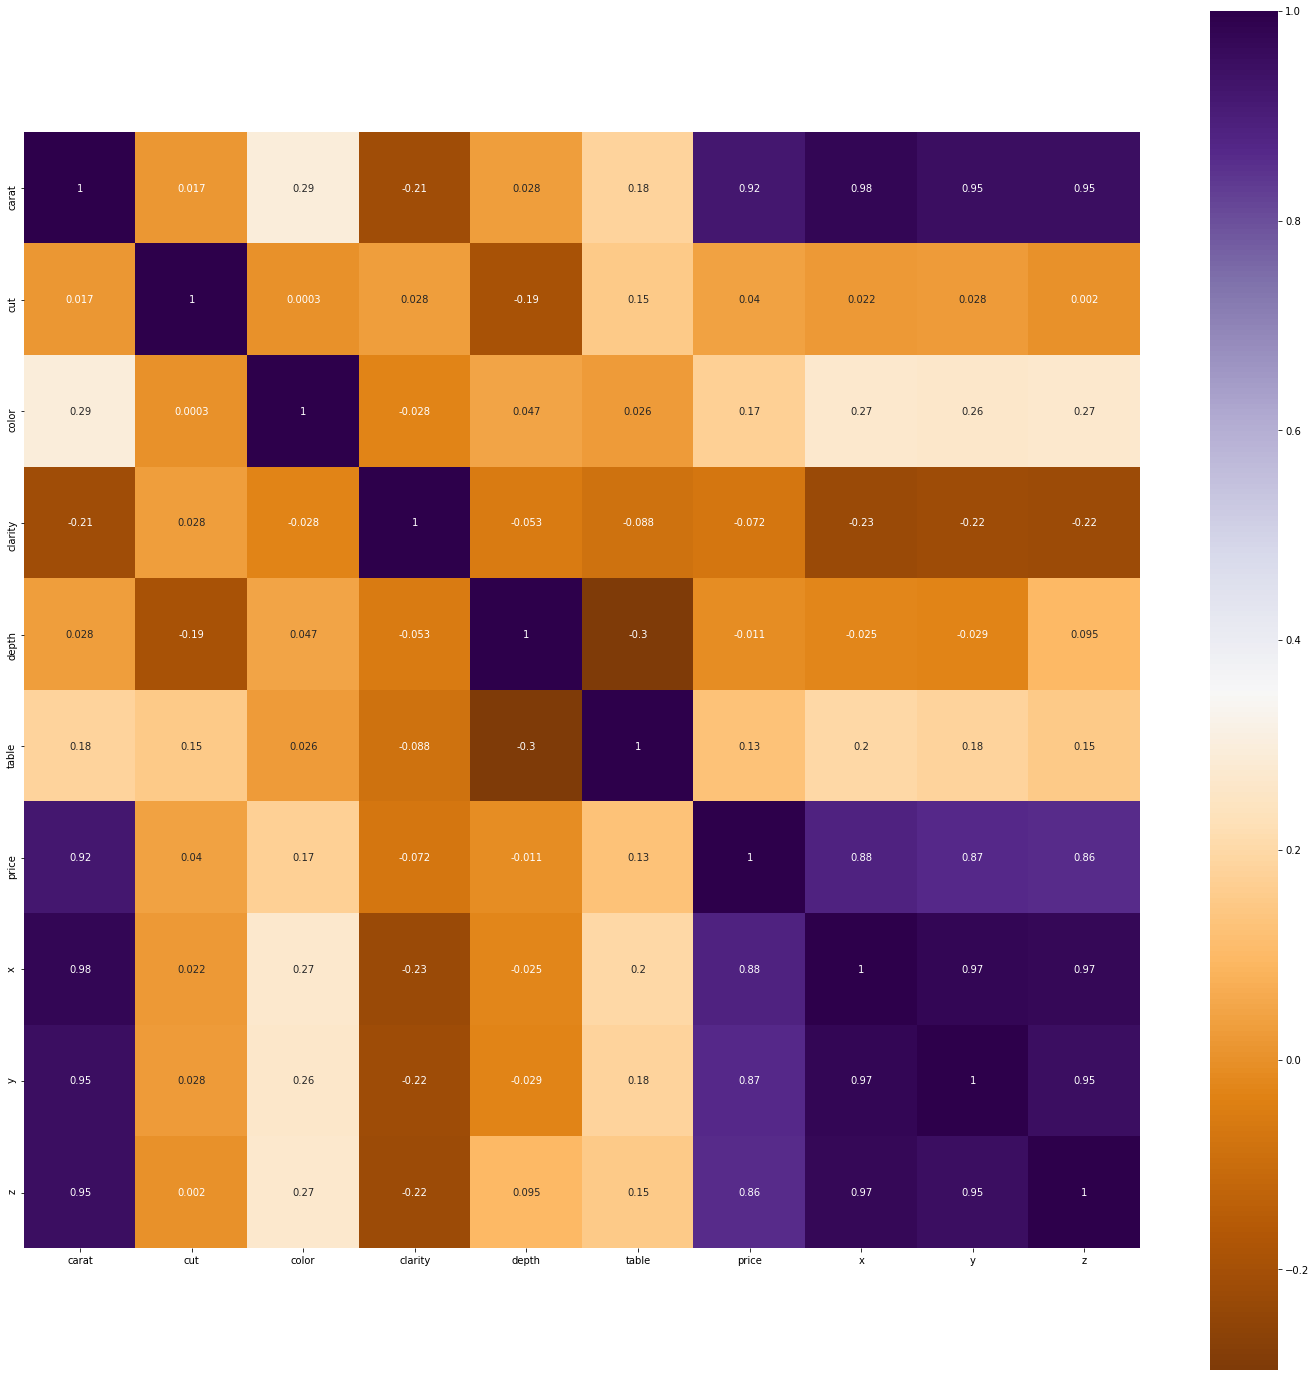

In [189]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(25, 25))
plotted = sns.heatmap(DataFrame.corr(), cmap='PuOr', annot=True, square=True)

#Establishing Correlations and Selecting Featured Variables 

In [178]:
correlations = DataFrame.corr()

#Correlation of other features in relation to price, dropping price.
diamond_price_correlations = correlations['price']
diamond_price_correlations = diamond_price_correlations.drop('price')
print(diamond_price_correlations)

#Extracting featured attributes
featured_attributes = [(diamond_price_correlations.index[no]) for no, elem in enumerate(diamond_price_correlations) if elem > 0.5]
target_attribute = 'price'

carat      0.921591
cut        0.039860
color      0.172511
clarity   -0.071535
depth     -0.010647
table      0.127134
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64


# Splitting into Feature Data and Target Data, also Train and Test sets

In [0]:
from sklearn.model_selection import train_test_split
X, y = DataFrame[featured_attributes], DataFrame[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


#Scaling Using StandardScaler

In [0]:
from sklearn.preprocessing import MaxAbsScaler
maxabs_scaler = MaxAbsScaler() 
maxabs_scaler.fit(X_train)
X_train = maxabs_scaler.transform(X_train)
X_test = maxabs_scaler.transform(X_test)

#Builing a Regression Model and Fitting Data 

In [192]:
from sklearn.linear_model import LinearRegression

# Creating polynomial data out of feature data

#Creating a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Coefficient:{}".format(lin_reg.coef_))
print("Intecept:{}".format(lin_reg.intercept_))
y_test_values = lin_reg.predict(X_test)
lin_reg.score(X_test, y_test)

Coefficient:[[ 50887.03427247  -9435.71505833   7205.17262067 -14916.31157326]]
Intecept:[1819.60332534]


0.8559825478751918

#Scatter Plot

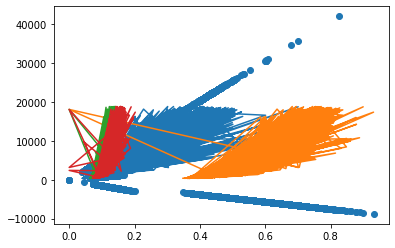

In [197]:
import matplotlib.pyplot as plt 
plt.scatter(X_test, lin_reg.coef_*X_test)
plt.plot(X_test, y_test)
plt.show()
